# 图26 箱线图

箱形图是一种可视化分布的好方法，关注中位数、第25个第45个四分位数和异常值。

箱线图需要注意解释可能会扭曲该组中包含的点数的框的大小，手动提供每个框中的观察数量可以帮助克服这个缺点.

1.23.5
2.0.0
3.7.1
0.12.2


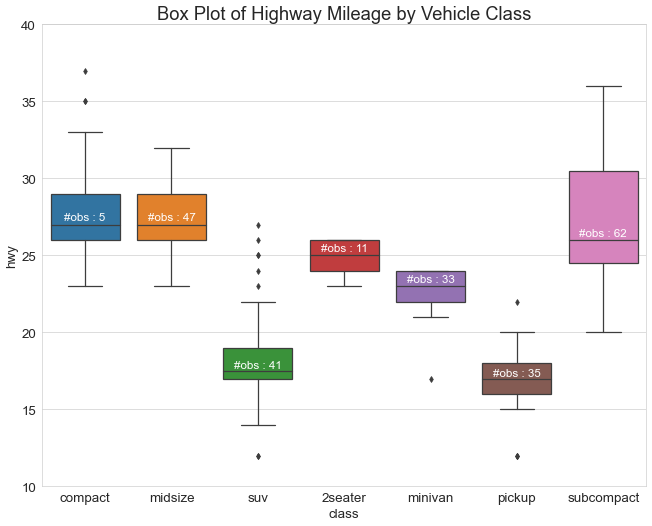

In [1]:
from doc.Plot.require import *

# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
# df = pd.read_csv("../data/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13, 10), dpi=60)
sns.boxplot(x='class', y='hwy', data=df, notch=False)


# Add N Obs inside boxplot (optional)
def add_n_obs(df, group_col, y):
    medians_dict = {grp[0]: grp[1][y].median() for grp in df.groupby(group_col)}
    xtick_labels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xtick_label), n_ob in zip(enumerate(xtick_labels), n_obs):
        plt.text(x, medians_dict[xtick_label] * 1.01, "#obs : " + str(n_ob), horizontalalignment='center',
                 fontdict={'size': 14}, color='white')


add_n_obs(df, group_col='class', y='hwy')

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.ylim(10, 40)
plt.show()